                    Open          High           Low         Close     Volume  \
Date                                                                            
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  133030000   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688  106380000   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703  112190000   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234  138740000   

               Adj Close  
Date                      
2016-07-01  17949.369141  
2016-06-30  17929.990234  
2016-06-29  17694.679688  
2016-06-28  17409.720703  
2016-06-27  17140.240234  


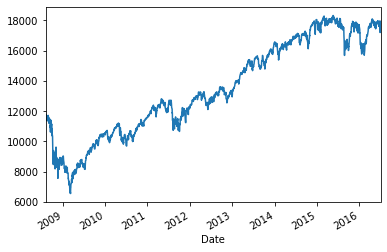

In [47]:
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
 
series = pd.read_csv('0.Raw_data/DJIA_table.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.iloc[:,0].plot()
pyplot.show()

In [58]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1988
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12652.340
Method:                       css-mle   S.D. of innovations            140.528
Date:                Thu, 07 Nov 2019   AIC                          25318.679
Time:                        11:51:37   BIC                          25357.843
Sample:                             1   HQIC                         25333.064
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.2365      2.678     -1.208      0.227      -8.486       2.013
ar.L1.D.Open    -0.0658      0.022     -2.935      0.003      -0.110      -0.022
ar.L2.D.Open    -0.0451      0.022     -2.00

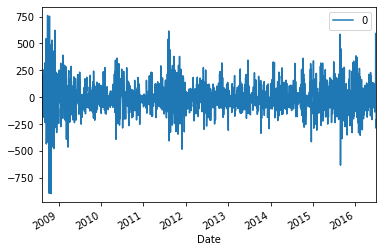

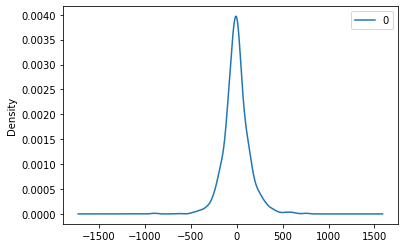

                 0
count  1988.000000
mean     -0.012019
std     140.568324
min    -896.841769
25%     -72.278126
50%      -5.851581
75%      64.394618
max     759.651121


In [60]:
model = ARIMA(series.iloc[:,3], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind="kde")
pyplot.show()
print(residuals.describe())

In [66]:
from sklearn.metrics import mean_squared_error

In [65]:
X = series.iloc[:,3].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print("predicted=%f, expected=%f" % (yhat, obs))
error = mean_squared_error(test, predictions)
print("Test MSE: %.3f" % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color="red")
pyplot.show()

predicted=11752.912969, expected=11734.320312


NameError: name 'mean_squared_error' is not defined

In [75]:
plt.plot(predictions)
plt.plot(series.iloc[:,3])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001BC7CE49B88> (for post_execute):


ValueError: view limit minimum -36807.3 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36807.3 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

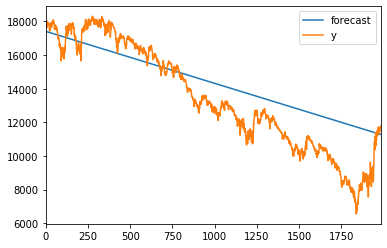

In [68]:
model_fit.plot_predict(dynamic=True)
plt.show()

In [67]:
series.iloc[:,3]

Date
2016-07-01    17949.369141
2016-06-30    17929.990234
2016-06-29    17694.679688
2016-06-28    17409.720703
2016-06-27    17140.240234
                  ...     
2008-08-14    11615.929688
2008-08-13    11532.959961
2008-08-12    11642.469727
2008-08-11    11782.349609
2008-08-08    11734.320312
Name: Close, Length: 1989, dtype: float64